<a href="https://colab.research.google.com/github/NanThawe/ML-zoomcamp-files/blob/main/02_regression_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-25 17:25:03--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  --.-KB/s    in 0.08s   

2023-09-25 17:25:03 (18.1 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



##EDA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
columns = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]
data = pd.read_csv('housing.csv', usecols=columns)

In [ ]:
print(data.shape)
data.head()

(20640, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


<Axes: xlabel='median_house_value', ylabel='Count'>

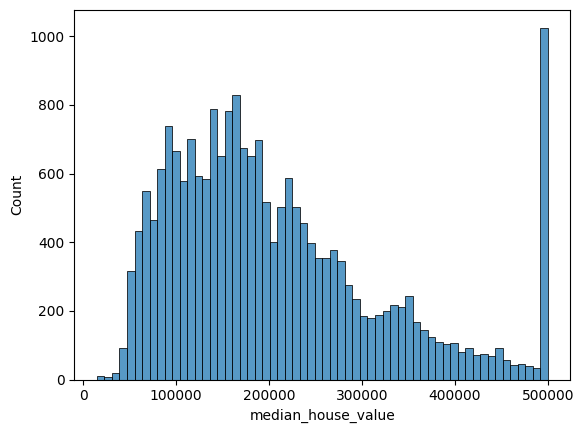

In [ ]:
sns.histplot(data.median_house_value, bins=60)


#Preparing the dataset


Question 1

In [ ]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Question 2

In [ ]:
median = data['population'].median()
median

1166.0

In [ ]:
np.log1p(data.median_house_value)



0        13.022766
1        12.789687
2        12.771673
3        12.740520
4        12.743154
           ...    
20635    11.265758
20636    11.252872
20637    11.432810
20638    11.346883
20639    11.400887
Name: median_house_value, Length: 20640, dtype: float64

In [ ]:
n = len(data)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [ ]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
df_shuffled = data.iloc[idx]

In [ ]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
y_train_og = df_train.median_house_value.values
y_val_og = df_val.median_house_value.values
y_test_og = df_test.median_house_value.values

y_train = np.log1p(y_train_og)
y_val = np.log1p(y_val_og)
y_test = np.log1p(y_test_og)

In [ ]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

Question 3

In [ ]:
#Linear regression
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [ ]:
base=["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms",
       "population", "households", "median_income"]

In [ ]:
def prepare_X(df,fill_value):
    df_num = df[base]
    df_num = df_num.fillna(fill_value)
    X = df_num.values
    return X

In [ ]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [ ]:
#Option 1 = mean
mean = df_train.total_bedrooms.mean()
X_train_mean = prepare_X(df_train,fill_value = mean)
w_0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

In [ ]:
X_val_mean = prepare_X(df_val, fill_value=mean)
y_mean_pred_val = w_0_mean + X_val_mean.dot(w_mean)

In [ ]:
np.round(rmse(y_val, y_mean_pred_val),2)

0.33

In [ ]:
#Option 2 = zero
X_train_zero = prepare_X(df_train, fill_value = 0)
w_0_zero, w_zero = train_linear_regression(X_train_zero, y_train)

In [ ]:
X_val_zero = prepare_X(df_val, fill_value=0)
y_zero_pred_val = w_0_zero + X_val_zero.dot(w_zero)

In [ ]:
np.round(rmse(y_val, y_zero_pred_val),2)

0.33

Question 4

In [ ]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [ ]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    w0, w = train_linear_regression_reg(X_train_zero, y_train, r=r)

    y_zero_val = w0 + X_val_zero.dot(w)
    score = np.round(rmse(y_val, y_zero_val),2)

    print(r, w0, score)

0.0 -11.686975242036546 0.33
1e-05 -11.68681458438968 0.33
0.0001 -11.685368865034667 0.33
0.001 -11.670931317799797 0.33
0.1 -10.274500282195673 0.33
1 -4.920480897742212 0.33
10 -0.7899311831779245 0.34


Question 5

In [ ]:
list_rmse = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  idx = np.arange(n)
  np.random.seed(r)
  np.random.shuffle(idx)
  df_shuffled = data.iloc[idx]

  df_train = df_shuffled.iloc[:n_train].copy()
  df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
  df_test = df_shuffled.iloc[n_train+n_val:].copy()

  df_train = df_train.reset_index(drop=True)
  df_val = df_val.reset_index(drop=True)
  df_test = df_test.reset_index(drop=True)

  y_train_og = df_train.median_house_value.values
  y_val_og = df_val.median_house_value.values
  y_test_og = df_test.median_house_value.values

  y_train = np.log1p(y_train_og)
  y_val = np.log1p(y_val_og)
  y_test = np.log1p(y_test_og)

  del df_train['median_house_value']
  del df_val['median_house_value']
  del df_test['median_house_value']

  X_train_zero = prepare_X(df_train, fill_value = 0)
  w_0, w = train_linear_regression(X_train_zero, y_train)

  X_val_zero = prepare_X(df_val, fill_value=0)
  y_zero_pred_val = w_0 + X_val_zero.dot(w)

  rmse_val = np.round(rmse(y_val, y_zero_pred_val),2)
  list_rmse.append(rmse_val)

  print(r, w_0, rmse_val)


0 -11.900382138125133 0.34
1 -11.732757372921618 0.34
2 -11.806729361193014 0.33
3 -11.587900347753235 0.34
4 -11.38947058831824 0.34
5 -11.447114275587968 0.34
6 -11.370516351548385 0.35
7 -12.47344891889502 0.34
8 -11.800287429792748 0.35
9 -11.459046830736924 0.34


In [ ]:
np.round(np.std(list_rmse),3)

0.005

Question 5

In [ ]:
def train_linear_regression_regular(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [ ]:
r = 9
idx = np.arange(n)
np.random.seed(r)
np.random.shuffle(idx)
df_shuffled = data.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

frame = [df_train, df_val]
df_train_val = pd.concat(frame)

df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_val_og = df_train_val.median_house_value.values
y_test_og = df_test.median_house_value.values

y_train_val = np.log1p(y_train_val_og)
y_test = np.log1p(y_test_og)

del df_train_val['median_house_value']
del df_test['median_house_value']



In [ ]:
X_train_val_zero = prepare_X(df_train_val, fill_value = 0)
w_0_train_val, w_train_val = train_linear_regression_regular(X_train_val_zero, y_train_val, r=0.001)

X_test_zero = prepare_X(df_test, fill_value=0)
y_zero_pred_val = w_0_train_val + X_test_zero.dot(w)

In [ ]:
np.round(rmse(y_test, y_zero_pred_val),2)

0.35